# 6.モデルの評価とハイパーパラメータチューニングのベストプラクティス

## 6.1 パイプラインによるワークフローの効率化

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [4]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

In [5]:
print(le.classes_)

['B' 'M']


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [7]:
# make pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([("sc1", StandardScaler()),
                    ("pca", PCA(n_components=2)),
                    ("clf", LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test, y_test)

0.94736842105263153

## 6.2 K-fold cross-validation
モデル選択の際にテストデータを使ってはいけないよという話。
k分割交差検証はモデルのチューニングに使われる。つまり、満足のいくはんか性能が得られる最適なハイパーパラメータが見つかったら、トレーニングセット全体でモデルを再びトレーニングし、トレーニングデータセットからは独立したデータセットを使って最終的な性能評価を得ることができる。kの値はだいたい10がいい。kを増やすと、評価のバイアスは低くなるが、バリアンスは高くなる。大きデータセットならk=5くらいでもいい。クラスの比率が均等でないケースではstratified k-foldを使うといい。

In [8]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

skfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1)
scores = []
for k, (train, test) in enumerate(skfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score  = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print("Fold: %s, Class dist.: %s, Acc: %.3f" %(k+1, np.bincount(y_train[train]), score))

print("CV accuracy: %.3f +/- %.3f" % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956
CV accuracy: 0.950 +/- 0.029


In [9]:
# scikit-learnをもっと利用した実装
# ちゃんと層化されてる？
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=2)
print("CV accuracy scores: %s" % scores)
print("CV accuracy: %.3f +/- %.3f" % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]
CV accuracy: 0.950 +/- 0.029


### 6.3 学習曲線と検証曲線によるアルゴリズムの診断
学習曲線はデータセットサイズの関数。検証曲線はハイパーパラメータの関数。

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([("sc1", StandardScaler()),
             ("clf", LogisticRegression(penalty="l2", random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1,1.0,10),
                                                        cv=10,
                                                        n_jobs=2)

/Users/sohei/.pyenv/versions/anaconda3-4.3.1/envs/py3.5/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [11]:
train_sizes

array([ 40,  81, 122, 163, 204, 245, 286, 327, 368, 409])

In [12]:
train_scores[2]

array([ 0.99180328,  0.98360656,  0.99180328,  0.99180328,  0.99180328,
        0.99180328,  0.99180328,  0.99180328,  0.99180328,  0.99180328])

In [13]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

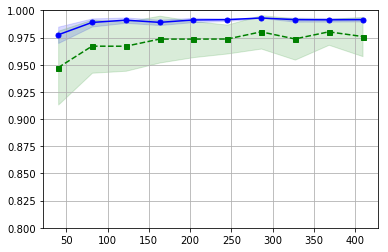

In [14]:
plt.plot(train_sizes, train_mean, color="blue", marker="o", markersize=5, label="training accuracy")
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color="blue")
plt.plot(train_sizes, test_mean, linestyle="--", color="green", marker="s", markersize=5, label="validation accuracy")
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color="green")
plt.grid()
plt.ylim([0.8,1.0])
plt.show()

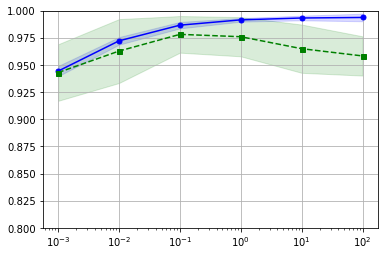

In [15]:
from sklearn.learning_curve import validation_curve
param_range = [ 10**i for i in range(-3,3)]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name="clf__C",
                                             param_range=param_range,
                                             cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color="blue", marker="o", markersize=5, label="training accuracy")
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color="blue")
plt.plot(param_range, test_mean, linestyle="--", color="green", marker="s", markersize=5, label="validation accuracy")
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color="green")
plt.xscale("log")
plt.grid()
plt.ylim([0.8,1.0])
plt.show()

## 6.4 Grid Search

In [19]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('sc1', StandardScaler()),
                    ('clf', SVC(random_state=1))])
param_range = [ 10**i for i in range(-3,4)]
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']},
              {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.978021978021978
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [25]:
pd.DataFrame(gs.grid_scores_).head()

,parameters,mean_validation_score,cv_validation_scores
0,"{'clf__C': 0.001, 'clf__kernel': 'linear'}",0.938462,"[0.95652173913, 0.934782608696, 0.934782608696..."
1,"{'clf__C': 0.01, 'clf__kernel': 'linear'}",0.960440,"[0.978260869565, 0.934782608696, 0.93478260869..."
2,"{'clf__C': 0.1, 'clf__kernel': 'linear'}",0.978022,"[0.95652173913, 0.95652173913, 0.95652173913, ..."
3,"{'clf__C': 1, 'clf__kernel': 'linear'}",0.975824,"[0.934782608696, 1.0, 0.95652173913, 0.9782608..."
4,"{'clf__C': 10, 'clf__kernel': 'linear'}",0.971429,"[0.978260869565, 0.978260869565, 0.95652173913..."


In [27]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.965


random search ってのもあるよ。

nested cross-validation(5*2 cross-validation)もいい。計算性能が重要になる大きなデータセットで役立つ可能性がある。

In [29]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.960 +/- 0.026


In [36]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.921 +/- 0.029


いまいち利点がよくわからない。

## 6.5 Scoring

cofusion matrix

In [63]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


In [47]:
import seaborn as sn
# 描画用関数
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

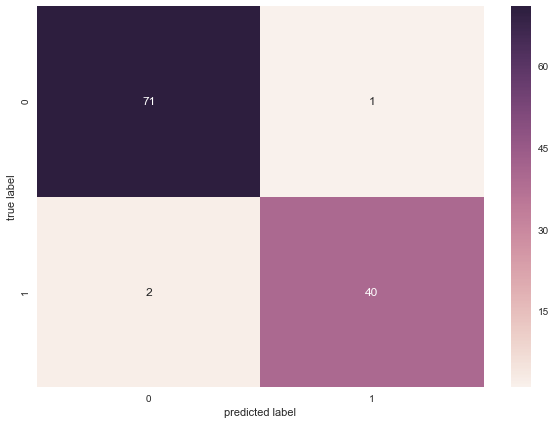

In [48]:
print_cmx(y_test, y_pred)

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


GridSearchCVにscoring関数を渡せる。
デフォルトでは1が陽性として扱われる。別の陽性ラベルを指定するときは以下のようにする。

In [62]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)

ROC(Receiver Operator Characteristic), AUC(Area Under the Curve)

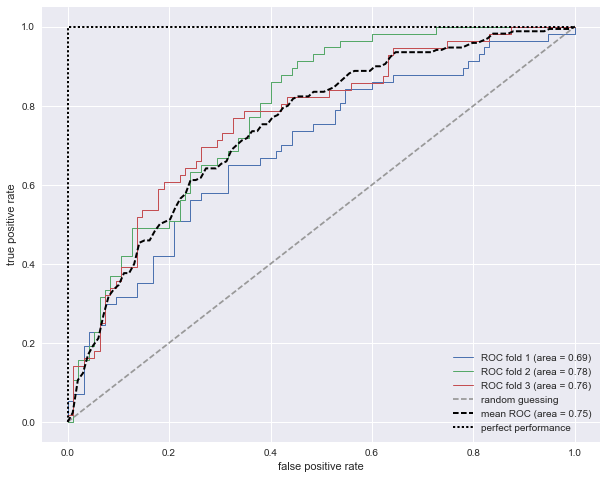

In [86]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = Pipeline([('sc1', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])
X_train2 = X_train[:, [4,14]]
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(10,8))
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0,1], [0,1], linestyle='--', color=(0.6,0.6,0.6), label='random guessing')    

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr , 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
plt.plot([0,0,1], [0,1,1], lw=2, linestyle=':', color='black', label='perfect performance')    

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

In [88]:
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:, [4,14]])
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.662
Accuracy: 0.711


In [106]:
# 描画用関数
def plot_roc(y_true, clf, pos_label=1):
    y_prob = clf.predict_proba(X_test[:,[4,14]])[:,1]
    fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.legend(loc='lower right')
    plt.show()

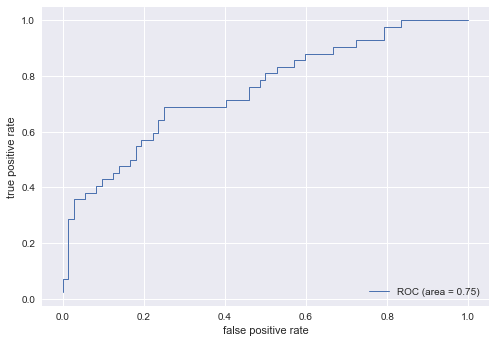

In [107]:
plot_roc(y_test, pipe_lr)

他クラスの場合にはマイクロ平均とマクロ平均が使える。マイクロ平均は各インスタンスまたは予測を平等に重み付けしたいときに役に立つ。マクロ平均は最も出現するクラスラベルに過度の影響を受けることなく分類器の全体的な性能を評価するために、すべてのクラスを平等に重み付けする。
scikit-learnではデフォルトで重み付けされたマクロ平均が使われる。これはクラスの不均衡に対処する場合に役立つ。